In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/tmp/ipykernel_171804/2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
dataset = pd.read_csv("gen_train.csv")
dataset.index = dataset["Unnamed: 0"]
dataset = dataset.drop(["Unnamed: 0"], axis=1)
dataset.index.name="Date"
dataset

,Energy_Generated_KWh,Temperature_C,apparent_zenith,azimuth,poa_global
Date,,,,,
2012-01-01,11.554859,21.729501,106.996890,110.484688,1283.873250
2012-01-02,12.365461,21.144177,107.094981,110.387431,1373.940064
2012-01-03,12.541793,22.455950,107.190916,110.282394,1393.532584
2012-01-04,12.272820,24.485566,107.284590,110.169622,1363.646661
2012-01-05,12.514748,21.313654,107.375902,110.049165,1390.527504
...,...,...,...,...,...
2016-12-27,11.882362,22.143366,106.559524,110.806436,1320.262440
2016-12-28,12.593951,26.954236,106.665553,110.742434,1399.327941
2016-12-29,12.187055,20.299848,106.769985,110.670488,1354.117271


In [3]:
import tensorflow as tf
tf.random.set_seed(42)
np.random.seed(42)
temp_noise = np.random.normal(0,2,len(dataset["Temperature_C"]))
dataset["Temperature_C"] += temp_noise
x_train = dataset[["Temperature_C","apparent_zenith", "azimuth", "poa_global"]][:1400]
y_train = dataset["Energy_Generated_KWh"][:1400]

x_validation = dataset[["Temperature_C","apparent_zenith", "azimuth", "poa_global"]][1400:]
y_validation = dataset["Energy_Generated_KWh"][1400:]

x_train = np.reshape(x_train.values, (x_train.shape[0], x_train.shape[1], 1))
x_validation = np.reshape(x_validation.values, (x_validation.shape[0], x_validation.shape[1], 1))


x_train.shape, y_train.shape, x_validation.shape, y_validation.shape

2024-03-10 04:04:47.178688: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-10 04:04:47.206535: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-10 04:04:47.206577: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-10 04:04:47.207377: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-10 04:04:47.212133: I tensorflow/core/platform/cpu_feature_guar

((1400, 4, 1), (1400,), (427, 4, 1), (427,))

In [4]:
import keras
from keras.layers import LSTM, Dense, BatchNormalization, Dropout, RNN, GRU
from keras.models import Sequential

In [5]:
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(LSTM(units=32))
model.add(BatchNormalization())
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(x_train, y_train, epochs = 45, batch_size = 64)

2024-03-10 04:04:48.613706: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-10 04:04:48.640754: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-10 04:04:48.640937: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Epoch 1/45


2024-03-10 04:04:52.218004: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-03-10 04:04:52.527379: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fca8d06cf30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-10 04:04:52.527401: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-03-10 04:04:52.531330: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1710023692.593471  171890 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


22/22 [==============================] - 4s 4ms/step - loss: 143.7131
Epoch 2/45
22/22 [==============================] - 0s 3ms/step - loss: 139.1823
Epoch 3/45
22/22 [==============================] - 0s 3ms/step - loss: 133.6231
Epoch 4/45
22/22 [==============================] - 0s 3ms/step - loss: 126.8859
Epoch 5/45
22/22 [==============================] - 0s 3ms/step - loss: 118.9258
Epoch 6/45
22/22 [==============================] - 0s 3ms/step - loss: 109.8486
Epoch 7/45
22/22 [==============================] - 0s 3ms/step - loss: 99.8545
Epoch 8/45
22/22 [==============================] - 0s 3ms/step - loss: 89.2430
Epoch 9/45
22/22 [==============================] - 0s 3ms/step - loss: 78.3073
Epoch 10/45
22/22 [==============================] - 0s 3ms/step - loss: 67.3540
Epoch 11/45
22/22 [==============================] - 0s 3ms/step - loss: 56.7228
Epoch 12/45
22/22 [==============================] - 0s 3ms/step - loss: 46.6884
Epoch 13/45
22/22 [=======================

In [6]:
test_ds = pd.read_csv("gen_test.csv")
test_ds.index = test_ds["Unnamed: 0"]
test_ds = test_ds.drop(["Unnamed: 0"], axis=1)
test_ds.index.name="Date"
test_ds

,Energy_Generated_KWh,Temperature_C,apparent_zenith,azimuth,poa_global
Date,,,,,
2017-01-01,12.206040,18.082216,107.072437,110.407309,1356.226709
2017-01-02,12.912132,21.976149,107.169217,110.303927,1434.681305
2017-01-03,12.373884,17.470092,107.263767,110.192788,1374.875980
2017-01-04,11.881190,21.149362,107.355967,110.073943,1320.132261
2017-01-05,12.009447,22.722054,107.445699,109.947445,1334.383011
...,...,...,...,...,...
2019-12-27,12.082557,22.362485,106.479178,110.850240,1342.506291
2019-12-28,12.155019,21.979287,106.586441,110.792084,1350.557631
2019-12-29,12.704918,25.588655,106.692138,110.725965,1411.657510


In [7]:
x_test = test_ds[["Temperature_C","apparent_zenith", "azimuth", "poa_global"]]
y_test = test_ds["Energy_Generated_KWh"]


x_test = np.reshape(x_test.values, (x_test.shape[0], x_test.shape[1], 1))

x_test.shape, y_test.shape

((1095, 4, 1), (1095,))

In [8]:
max(test_ds["Energy_Generated_KWh"])

13.595773557085762

35/35 [==============================] - 1s 1ms/step


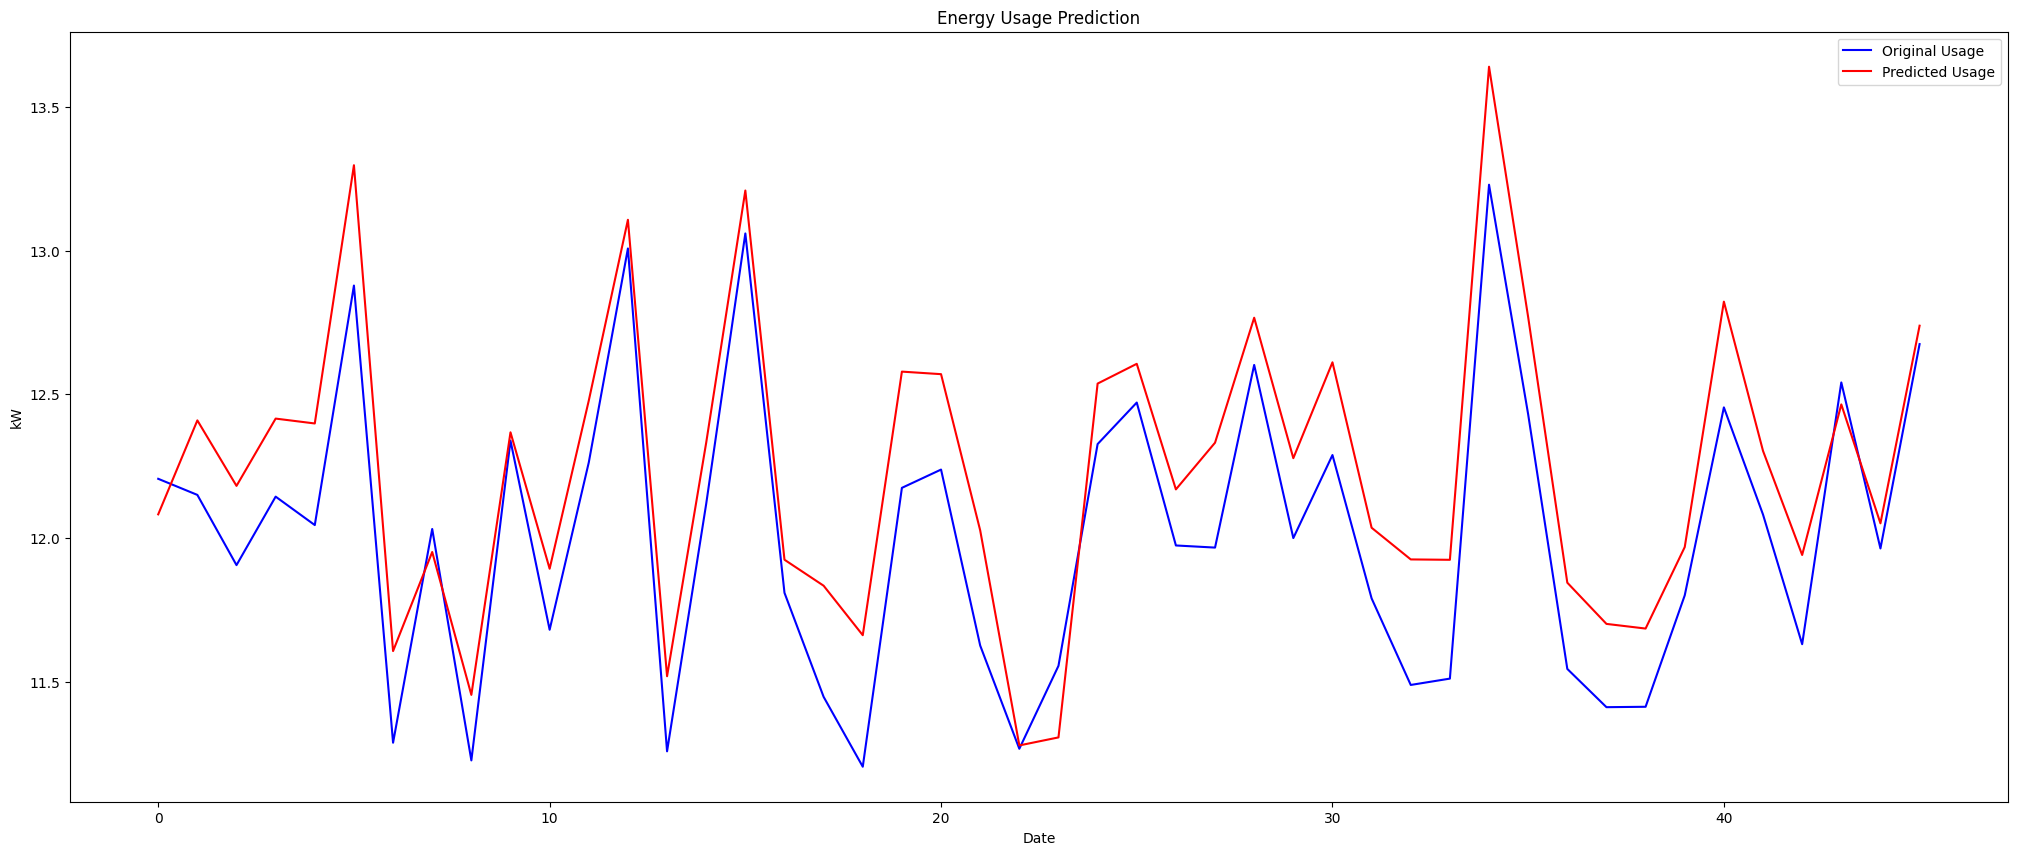

In [9]:
predictions = model.predict(x_test)
plt.figure(figsize=(25,10))
plt.plot(y_test.values[::24], color='blue', label='Original Usage')
plt.plot(predictions[:,0][::24] , color='red', label='Predicted Usage')
plt.title('Energy Usage Prediction')
plt.xlabel('Date')
plt.ylabel('kW')
plt.legend()
plt.show()

In [10]:
model.save("bestest.h5")

/home/ujjwal/miniconda3/envs/tf2.15/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
def make_preds_return_average(model_path, test_data, start_date='2017-01-01', end_date='2019-12-31'):
    model_1 = tf.keras.models.load_model(model_path)
    predictions = model_1.predict(test_data)
    predictions_df = pd.DataFrame(predictions, columns=['preds'])
    predictions_df.index = pd.date_range(start=start_date, end=end_date, freq='D')
    return list(predictions_df.resample("ME").sum().resample("YE").mean()["preds"])
make_preds_return_average('bestest.h5', x_test)

35/35 [==============================] - 1s 1ms/step


[374.23681640625, 372.61181640625, 374.9263610839844]